In [3]:
import torch
import torch.nn as nn
from torch import tensor
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision.transforms import v2
%matplotlib inline

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 
    'worm'
]


Files already downloaded and verified
Files already downloaded and verified


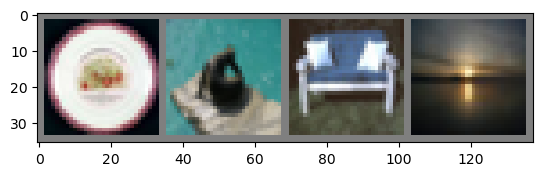

plate  seal couch   sea


In [5]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


# Resnet-18 with ADAM

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Load a prebuilt ResNet model. Here we use ResNet18 as an example.
        self.resnet = models.resnet18(pretrained=False)
        
        # CIFAR-100 images are 32x32, which is small for ResNet's initial convolution.
        # We'll modify the first convolutional layer to accept smaller images.
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

        # ResNet's fully connected layer is also designed for ImageNet's 1000 classes.
        # We'll replace it with a new layer for 100 classes (CIFAR-100).
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 100)

    def forward(self, x):
        return self.resnet(x)

# Assuming 'device' is defined (e.g., 'cuda' or 'cpu')
net = Net()
net.to(device)

c:\Users\Melvyn Tan\miniconda3\envs\GPU\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Melvyn Tan\miniconda3\envs\GPU\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Net(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [8]:
import torch.optim as optim

# Your existing loss function remains the same
loss_func = nn.CrossEntropyLoss()

# Initialize the Adam optimizer
opt = optim.Adam(net.parameters(), lr=0.001)

In [10]:
avg_losses = []   # Avg. losses.
epochs = 100       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.548
[epoch: 0, i:  1999] avg mini-batch loss: 4.251
[epoch: 0, i:  2999] avg mini-batch loss: 4.092
[epoch: 0, i:  3999] avg mini-batch loss: 3.941
[epoch: 0, i:  4999] avg mini-batch loss: 3.817
[epoch: 0, i:  5999] avg mini-batch loss: 3.725
[epoch: 0, i:  6999] avg mini-batch loss: 3.649
[epoch: 0, i:  7999] avg mini-batch loss: 3.578
[epoch: 0, i:  8999] avg mini-batch loss: 3.553
[epoch: 0, i:  9999] avg mini-batch loss: 3.438
[epoch: 0, i: 10999] avg mini-batch loss: 3.384
[epoch: 0, i: 11999] avg mini-batch loss: 3.353
[epoch: 1, i:   999] avg mini-batch loss: 3.164
[epoch: 1, i:  1999] avg mini-batch loss: 3.195
[epoch: 1, i:  2999] avg mini-batch loss: 3.132
[epoch: 1, i:  3999] avg mini-batch loss: 3.089
[epoch: 1, i:  4999] avg mini-batch loss: 3.029
[epoch: 1, i:  5999] avg mini-batch loss: 3.033
[epoch: 1, i:  6999] avg mini-batch loss: 2.928
[epoch: 1, i:  7999] avg mini-batch loss: 2.949
[epoch: 1, i:  8999] avg mini-batch loss

KeyboardInterrupt: 

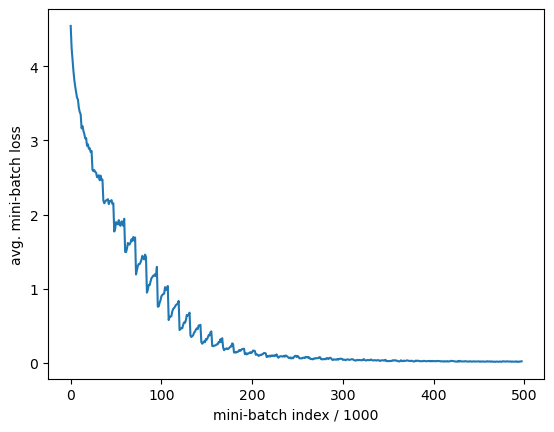

In [11]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

100 Epochs - Avg mini-batch loss ~ 0.010. Test accuracy 46%

In [12]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the X test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the X test images: 46 %
